# <font color=white>Zomato Analysis</font>
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats import anova
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
#reading cleaned csv file
df = pd.read_csv("../data/zomatoClean.csv")

We look at two key variables in the dataset - Aggregate Ratings and Votes (Number of Ratings) to analyze the effect of various factors such as online delivery, table reservations and cuisine. 

<AxesSubplot:xlabel='rating', ylabel='Count'>

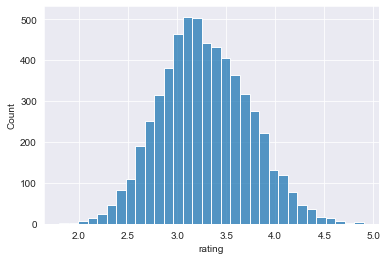

In [187]:
#Histogram of ratings for the entire dataset.
sns.set_style("darkgrid")
sns.histplot(data=df, x="rating",bins=32)

(0.0, 1000.0)

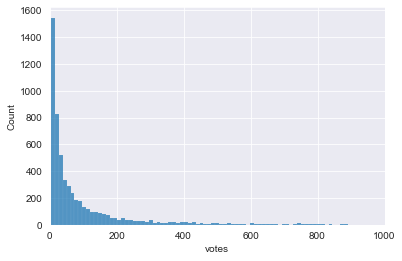

In [188]:
#Histogram of votes for the entire dataset.
sns.set_style("darkgrid")
sns.histplot(data=df, x="votes")
plt.xlim(0,1000)

<AxesSubplot:xlabel='LOG_VOTES', ylabel='Count'>

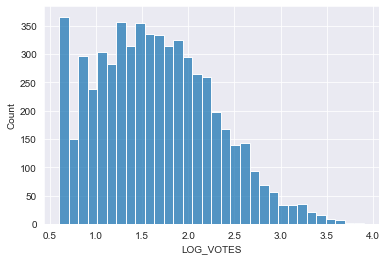

In [189]:
# Creating a log votes feature and Histogram of log votes for the entire dataset.
df['LOG_VOTES'] = np.log10(df['votes'])
sns.set_style("darkgrid")
sns.histplot(data=df, x="LOG_VOTES")

Let us first analyze Ratings. This is normally distributed for the entire Dataset. Maybe because we have a lot of ratings from a relatively small population (NCR region) or because culturally, Extremely bad or extremely good ratings are rarely given out.

__1) Do the ratings of expensive restaurants differ from the ratings of inexpensive restaurants? (μ = Mean rating)__

We have bucketed the column ‘Price Range’ into two categories (combining 1 + 2 for ‘inexpensive’ and 3 + 4 for ‘expensive’ restaurants). The threshold for a restaurant to be considered as expensive is set to be around Rs.1000 ($13.42 approx). 

Hypothesis: <br>
H0: Average ratings for expensive restaurants is equal to the average ratings for inexpensive restaurants <br>
HA: Average ratings for expensive restaurants is not equal to the average ratings for inexpensive restaurants <br>

Mathematically,<br>
__H0: μ<sub>expensive</sub> = μ<sub>inexpensive</sub> <br>
HA: μ<sub>expensive</sub> ≠ μ<sub>inexpensive</sub>__

Method: Two-sample two-tail hypothesis z-test for 
Level of significance, α = 0.05

In [190]:
#Dividing the df based on price range
x = df[df['price_range']==1]
y = df[df['price_range']==2]
inexpensive =  x.append(y, ignore_index=True)
x = df[df['price_range']==3]
y = df[df['price_range']==4]
expensive = x.append(y, ignore_index=True)

In [191]:
#Checking sample size and variance
print("Inexpensive sample size : {}\nExpensive sample size : {}".format(len(inexpensive),len(expensive)))
varInexp = np.var(inexpensive['rating'])
varExp = np.var(expensive['rating'])
print("Inexpensive variance : {}\nExpensive variance : {}".format(varInexp,varExp))

Inexpensive sample size : 4731
Expensive sample size : 1077
Inexpensive variance : 0.18333142424071763
Expensive variance : 0.2514515112562923


Text(0.5, 1.0, 'Aggregate Rating (Expensive)')

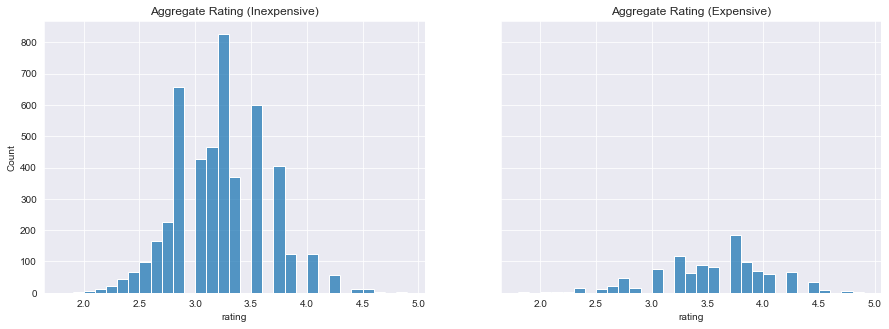

In [192]:
fig, axes = plt.subplots(1,2,figsize=(15, 5),sharex=True,sharey=True)
sns.histplot(ax =axes[0],data=inexpensive, x="rating",bins=30)
sns.histplot(ax =axes[1],data=expensive, x="rating",bins=31)

axes[0].set_title('Aggregate Rating (Inexpensive)')
axes[1].set_title('Aggregate Rating (Expensive)')

In [193]:
#Performing the Z test
se = ((varInexp/len(inexpensive))+(varExp/len(expensive)))**0.5
mean_difference = inexpensive["rating"].mean()-expensive["rating"].mean()
test_statistic = (mean_difference)/(se) 
p_val = stats.norm.sf(abs(test_statistic))*2 
print('\033[1m'+'Two Tailed Z Test : '+'\tTest statistic: %f' %(test_statistic))
scientific_notation = "{:.2e}".format(p_val)
print('\033[1m'+'\t\t\tp-value : {}' .format(scientific_notation))

#printing confidence interval at a 0.05 significance level.
A = mean_difference-1.96*se
B = mean_difference+1.96*se
print('\033[1m'+'Confidence Interval :\t(%f,%f)' %(A,B)) 

Two Tailed Z Test : 	Test statistic: -22.873230
			p-value : 8.58e-116
Confidence Interval :	(-0.409730,-0.345053)


Text(0.5, 1.0, 'Rating (Expensive)')

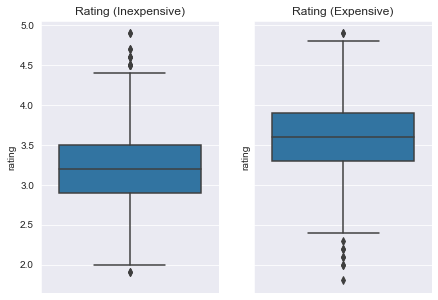

In [194]:
#Descriptive Statistics
fig, axes = plt.subplots(1,2, figsize=(7, 5),sharey=True)
sns.boxplot(ax = axes[0], y = inexpensive["rating"] );
sns.boxplot(ax = axes[1],y = expensive["rating"] );
axes[0].set_title('Rating (Inexpensive)')
axes[1].set_title('Rating (Expensive)')

We reject the Null Hypothesis that rating for inexpensive and expensive restaurants are equal at a 0.05 significance level. <br>
The ratings for expensive restaurants are higher.

__2) Does providing online delivery affect the ratings?__<br>

Hypothesis: <br>
H0: Ratings for Restaurants with Online Delivery is equal to Ratings for Restaurants without Online Delivery <br>
HA: Ratings for Restaurants with Online Delivery is not equal to Ratings for Restaurants without Online Delivery <br>

Mathematically,<br>
__H0: μ<sub>withdelivery</sub> = μ<sub>withoutdelivery</sub><br>
HA: μ<sub>withdelivery</sub> > μ<sub>withoutdelivery</sub>__

Method: Two-sample two-tailed hypothesis z-test. <br>
Level of significance, α = 0.05<br>

Result: Do we reject or fail to reject the null hypothesis. Does the availability of online delivery services affect the restaurant ratings?

In [195]:
#Dividing the df based on delivery option
withDelivery = df[df['has_online_delivery']==True]
withoutDelivery = df[df['has_online_delivery']==False]

In [196]:
#Checking sample size and variances of both population samples
print("With Delivery sample size : {}\nWithout Delivery sample size : {}".format(len(withDelivery),len(withoutDelivery)))
varWDel = np.var(withDelivery['rating'])
varWoDel = np.var(withoutDelivery['rating'])
print("With Delivery variance : {}\nWithout Delivery variance : {}".format(varWDel,varWoDel))

With Delivery sample size : 2227
Without Delivery sample size : 3581
With Delivery variance : 0.26438408566619903
Without Delivery variance : 0.1851716461597533


Text(0.5, 1.0, 'Aggregate Rating (withoutDelivery)')

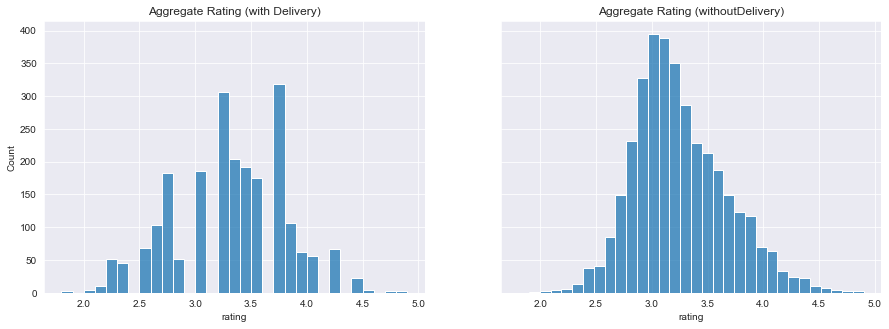

In [197]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize=(15, 5),sharex=True,sharey=True)
sns.histplot(ax =axes[0],data=withDelivery, x="rating",bins=31)
sns.histplot(ax =axes[1],data=withoutDelivery, x="rating",bins=31)

axes[0].set_title('Aggregate Rating (with Delivery)')
axes[1].set_title('Aggregate Rating (withoutDelivery)')

In [198]:
#Performing Z Test
se = ((varWDel/len(withDelivery))+(varWoDel/len(withoutDelivery)))**0.5
mean_difference = withDelivery["rating"].mean()-withoutDelivery["rating"].mean()
test_statistic = (mean_difference)/(se) 
p_val = stats.norm.sf(abs(test_statistic))
print('\033[1m'+'Two Tailed Z Test : '+'\tTest statistic: %f' %(test_statistic))
scientific_notation = "{:.2e}".format(p_val)*2
print('\033[1m'+'\t\t\tp-value : {}' .format(scientific_notation))

#printing confidence interval at a 0.05 significance level.
A = mean_difference-1.96*se
B = mean_difference+1.96*se
print('\033[1m'+'Confidence Interval :\t(%f,%f)' %(A,B)) 

Two Tailed Z Test : 	Test statistic: 6.923734
			p-value : 2.20e-122.20e-12
Confidence Interval :	(0.064800,0.115975)


Text(0.5, 1.0, 'Rating (Without Delivery)')

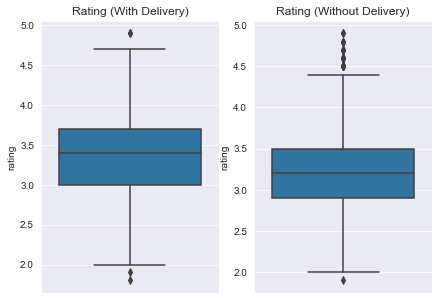

In [199]:
#Descriptive Statistics
fig, axes = plt.subplots(1,2, figsize=(7, 5))
sns.boxplot(ax = axes[0], y = withDelivery["rating"] );
sns.boxplot(ax = axes[1],y = withoutDelivery["rating"] );
axes[0].set_title('Rating (With Delivery)')
axes[1].set_title('Rating (Without Delivery)')

We reject the Null Hypothesis that rating for restaurants with delivery  and without delivery are equal at a 0.05 significance level. <br>
The ratings for restaurants with delivery are higher.

__3) Does offering table reservations affect the ratings?__<br>

Hypothesis: <br>
H0: Ratings for Restaurants with Table Booking is equal to Ratings for Restaurants without Table Booking <br>
HA: Ratings for Restaurants with Table Booking is higher to Ratings for Restaurants without Table Booking <br>

Mathematically,<br>
__H0: μ<sub>withtablebooking</sub> = μ<sub>withouttablebooking</sub><br>
HA: μ<sub>withtablebooking</sub> > μ<sub>withouttablebooking</sub>__

Method: Two-sample two-tail hypothesis z-test. <br>
Level of significance, α = 0.05<br>

Result: Do we reject or fail to reject the null hypothesis. Does the availability of table reservations significantly affect the restaurant ratings?

In [200]:
#Dividing the df based on table booking option
tableBooking = df[df['has_table_booking']==True]
noTableBooking = df[df['has_table_booking']==False]

In [201]:
#Checking sample size and variances of both population samples
print("With Table Booking sample size : {}\nWithout Table Booking sample size : {}".format(len(tableBooking),len(noTableBooking)))
varTBook = np.var(tableBooking['rating'])
varTNBook = np.var(noTableBooking['rating'])
print("With Table Booking variance : {}\nWithout Table Booking variance : {}".format(varTBook,varTNBook))

With Table Booking sample size : 1002
Without Table Booking sample size : 4806
With Table Booking variance : 0.24696408580045418
Without Table Booking variance : 0.1978451335885677


Text(0.5, 1.0, 'Aggregate Rating (Without Table Reservations)')

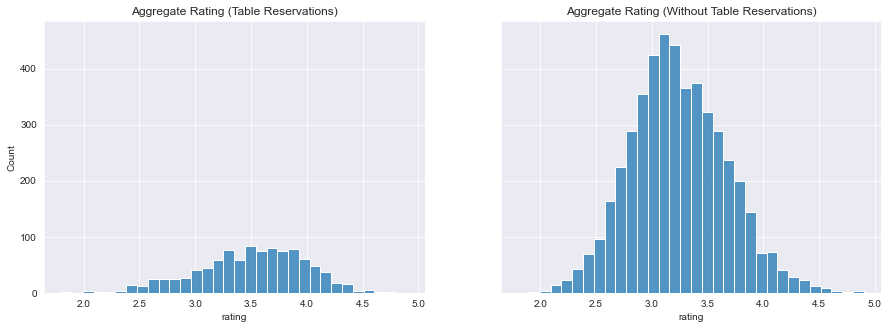

In [202]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize=(15, 5),sharex=True,sharey=True)
sns.histplot(ax =axes[0],data=tableBooking, x="rating",bins=31)
sns.histplot(ax =axes[1],data=noTableBooking, x="rating",bins=31)
axes[0].set_title('Aggregate Rating (Table Reservations)')
axes[1].set_title('Aggregate Rating (Without Table Reservations)')

In [203]:
#performing Z test
mean_difference = tableBooking["rating"].mean()-noTableBooking["rating"].mean()
se = ((varTBook/len(tableBooking))+(varTNBook/len(noTableBooking)))**0.5
test_statistic = (mean_difference)/(se) 
p_val = stats.norm.sf(abs(test_statistic))*2 
print('\033[1m'+'Two Tailed Z Test : '+'\tTest statistic: %f' % (test_statistic))
scientific_notation = "{:.2e}".format(p_val)
print('\033[1m'+'\t\t\tp-value : {}' .format(scientific_notation))

#printing confidence interval at a 0.05 significance level.
A = mean_difference-1.96*se
B = mean_difference+1.96*se
print('\033[1m'+'Confidence Interval :\t(%f,%f)' %(A,B)) 

Two Tailed Z Test : 	Test statistic: 16.483528
			p-value : 4.82e-61
Confidence Interval :	(0.246317,0.312800)


Text(0.5, 1.0, 'Rating (No Table Booking)')

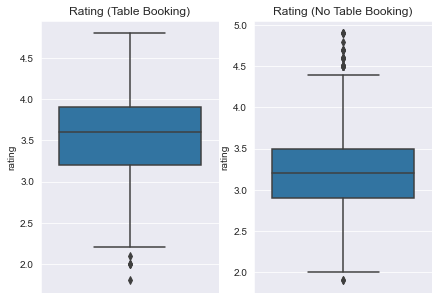

In [204]:
#Descriptive Statistics
fig, axes = plt.subplots(1,2, figsize=(7, 5))
sns.boxplot(ax = axes[0], y = tableBooking["rating"] );
sns.boxplot(ax = axes[1],y = noTableBooking["rating"] );
axes[0].set_title('Rating (Table Booking)')
axes[1].set_title('Rating (No Table Booking)')

__4) How does cuisine affect the restaurants’ ratings?<br> 
a) How do the ratings compare for the top 5 individual cuisines?__<br>


Level of significance, α = 0.05<br>
H0: There is no difference in average rating of  top 5 cuisines <br>
H1: There is a difference in average rating of top 5 cuisines<br>

Mathematically,<br>
__H<sub>0</sub>: μ<sub>cusine1</sub> = μ<sub>cusine2</sub> = μ<sub>cusine3</sub> = μ<sub>cusine4</sub> = μ<sub>cusine5</sub><br>
H<sub>1</sub>: Ǝi,j : μ<sub>cusine<sub>i</sub></sub>  ≠ μ<sub>cusine<sub>j</sub></sub><br>__<br>
Method: Analysis of Variance (ANOVA)<br>
Five specific cuisines we are going to analyze:<br>
1)Fast Food<br>
2)North Indian<br>
3)Cafe<br>
4)Chinese<br>
5)Street Food<br>
<br>
Result: Do we reject or fail to reject the null hypothesis. Do the restaurants serving the above cuisines have different ratings?

In [205]:
#Finding top 5 individual cuisines
df['cuisines'].value_counts().head(6)

Multicuisine    2255
Fast Food       1456
North Indian     832
Cafe             510
Chinese          215
Street Food       91
Name: cuisines, dtype: int64

In [206]:
#creating a df with only the top 5 individual cuisines
topCuisines = ['Fast Food','North Indian','Cafe','Chinese','Street Food']
df_topCuisine = df.loc[df['cuisines'].isin(topCuisines),:]

In [207]:
#Checking variance and sample size and variance for all these groups
df1,df2,df3,df4,df5 = [df_topCuisine.loc[(df_topCuisine["cuisines"] == x)] for x in ['Fast Food','North Indian','Cafe','Chinese','Street Food']]
print("Fast Food sample size : %f\nNorth Indian sample size : %f\nCafe sample size : %f\nChinese sample size : %f\nStreet Food sample size : %f" %(len(df1),len(df2),len(df3),len(df4),len(df5)))
print("\n\nFast Food variance : %f\nNorth Indian variance : %f\nCafe variance : %f\nChinese variance : %f\nStreet Food variance : %f" %(df1["rating"].var(),df2["rating"].var(),df3["rating"].var(),df4["rating"].var(),df5["rating"].var()))

Fast Food sample size : 1456.000000
North Indian sample size : 832.000000
Cafe sample size : 510.000000
Chinese sample size : 215.000000
Street Food sample size : 91.000000


Fast Food variance : 0.192734
North Indian variance : 0.176762
Cafe variance : 0.162946
Chinese variance : 0.165594
Street Food variance : 0.151243


In [208]:
#performing ANOVA
modelTopCuisine = ols('rating ~ cuisines',data=df_topCuisine).fit()
anova = sm.stats.anova_lm(modelTopCuisine,typ=1)
print(anova)
scientific_notation = "{:.2e}".format(anova['PR(>F)'][0])
print('\033[1m'+"\n\nF statistic : %f"%(anova['F'][0]))
print('\033[1m'+'p-value : {}' .format(scientific_notation))

              df      sum_sq   mean_sq         F        PR(>F)
cuisines     4.0    9.868521  2.467130  13.66988  4.732566e-11
Residual  3099.0  559.305281  0.180479       NaN           NaN


F statistic : 13.669880
p-value : 4.73e-11


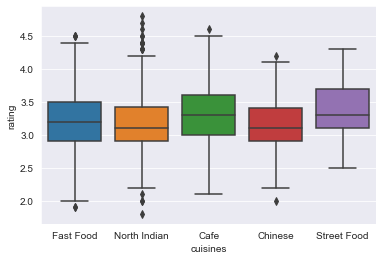

In [209]:
#Descriptive Statistics
sns.boxplot( x= df_topCuisine["cuisines"],y=df_topCuisine["rating"] );

In [210]:
#performing pair wise two tailed Z tests
def Ztest(df, pair):
    df1,df2 = [df.loc[(df["cuisines"] == x)] for x in pair]
    test_statistic = (df1["rating"].mean()-df2["rating"].mean())/(((np.var(df1["rating"])/len(df1))+(np.var(df2["rating"])/len(df2)))**0.5) 
    p_val = stats.norm.sf(abs(test_statistic))*2 
    print("(%s,%s) :"%(pair[0],pair[1]))
    print('\tTest statistic: %f' %(test_statistic))
    #scientific_notation = "{:.2e}".format(p_val)
    print('\tp-value : {}' .format(p_val))
groups=['Fast Food','North Indian','Cafe','Chinese','Street Food']
print('Two Tailed Z Tests \n')
for i in range(len(groups)-1):
    for j in range(i+1,len(groups)):
        Ztest(df_topCuisine,[groups[i],groups[j]])        

Two Tailed Z Tests 

(Fast Food,North Indian) :
	Test statistic: 1.095338
	p-value : 0.27336845389488207
(Fast Food,Cafe) :
	Test statistic: -5.272630
	p-value : 1.344823551827042e-07
(Fast Food,Chinese) :
	Test statistic: 2.418548
	p-value : 0.01558259504940671
(Fast Food,Street Food) :
	Test statistic: -3.937410
	p-value : 8.236577841841472e-05
(North Indian,Cafe) :
	Test statistic: -5.741913
	p-value : 9.361285031352905e-09
(North Indian,Chinese) :
	Test statistic: 1.667913
	p-value : 0.09533302207412372
(North Indian,Street Food) :
	Test statistic: -4.323601
	p-value : 1.5350249303762395e-05
(Cafe,Chinese) :
	Test statistic: 5.600084
	p-value : 2.1424844443533177e-08
(Cafe,Street Food) :
	Test statistic: -1.217588
	p-value : 0.223380713139114
(Chinese,Street Food) :
	Test statistic: -4.856784
	p-value : 1.1930747742749726e-06


Failed to reject the null hypothesis with a significance level of 0.005 (After Bonferroni Correction 0.05/10) for : <br>
1. Fast Food , North Indian<br>
2. North Indian , Chinese<br>
3. Cafe, Street Food<br>
4. Fast Food, Chinese<br>

__b) Are multi cuisine restaurants rated higher than single cuisine restaurants?__<br>

For this, we will be creating a new variable that would indicate whether a restaurant serves multiple cuisines derived from the ‘Cuisine’ (list of cuisines offered) features. <br>

North Indian  : North Indian, Rajasthani, Lucknowi, Kashmiri, Mughlai<br>
South Indian  : South Indian, Kerala, Hyderabadi, Chettinad, Andhra, Mangalorean<br>
North East Indian : North Eastern, Assamese<br>
East Indian : East Indian, Bihari, Awadhi, Oriya, Bengali<br>
West Indian : West Indian, Gujarati, Goan, Maharashtrian<br>
Asian : Asian, Japanese, Thai, Korean, Vietnamese, Sushi, Malaysian<br>
Chinese   : Chinese, Naga, Tibetan, Burmese<br>
Cafe      : Cafe, Cafe, Bakery, Desserts<br>
Beverages : Beverages, Drinks Only, Tea, Juices<br>
European  : European, Continental, French, British, Belgian, Portuguese<br>
Mediterranean : Mediterranean, Greek, Spanish<br>
Middle Eastern : Middle Eastern, Iranian, Moroccan, Turkish, Lebanese, Armenian, Lebanese, Persian<br>
American  : American, South American, Tex-Mex, Steak<br>
Italian   : Italian, Pizza<br>
Healthy   : Healthy Food, Salad<br>

Hypothesis: <br>
H0: Mean rating for multi-cuisine restaurants is equal to the rating for single-cuisine restaurants <br>
H1: Mean rating for multi-cuisine restaurants is not equal to the rating for single-cuisine restaurants<br>

Mathematically,<br>
__H0: μ<sub>multicuisine</sub> = μ<sub>singlecuisine</sub><br>
HA: μ<sub>multicuisine</sub>  > μ<sub>singlecuisine</sub>__  <br>

Method: Two-tail two-sample hypothesis z-test.<br>
Reason: Large sample sizes.<br>
Level of significance, α = 0.05<br>
Result: Do we reject or fail to reject the null hypothesis. Do multicuisine restaurants have significantly higher ratings?

In [211]:
#Dividing df based on single vs multi cuisine (Restaurants with more than one location are considered multicuisine)
singleCuisine = df[df['cuisines']!='Multicuisine']
multiCuisine = df[df['cuisines']=='Multicuisine']

In [212]:
#Checking sample sizes and variances
print("Single Cuisine sample size : {}\nMulticuisine sample size : {}".format(len(singleCuisine),len(multiCuisine)))
varSingleCuisine = np.var(singleCuisine['rating'])
varMultiCuisine = np.var(multiCuisine['rating'])
print("Single Cuisine variance : {}\nMulticuisine variance : {}".format(varSingleCuisine,varMultiCuisine))

Single Cuisine sample size : 3553
Multicuisine sample size : 2255
Single Cuisine variance : 0.19098145733986024
Multicuisine variance : 0.2540798049173773


Text(0.5, 1.0, 'Aggregate Rating (Multicuisine)')

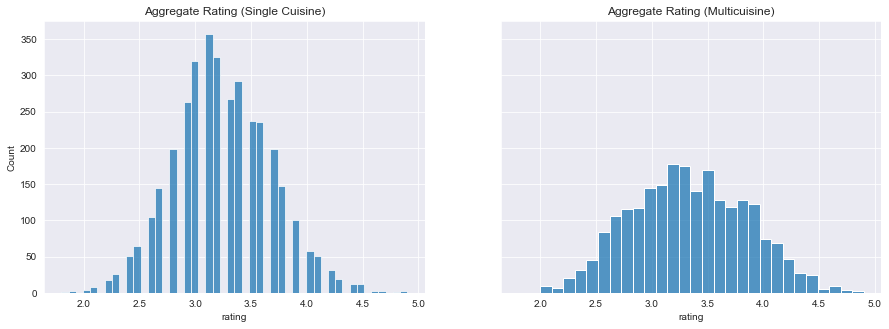

In [213]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize=(15, 5),sharex=True,sharey=True)
sns.histplot(ax =axes[0],data=singleCuisine, x="rating")
sns.histplot(ax =axes[1],data=multiCuisine, x="rating")

axes[0].set_title('Aggregate Rating (Single Cuisine)')
axes[1].set_title('Aggregate Rating (Multicuisine)')

In [214]:
#t test welch
mean_difference = singleCuisine["rating"].mean()-multiCuisine["rating"].mean()
se = ((varSingleCuisine/len(singleCuisine))+(varMultiCuisine/len(multiCuisine)))**0.5
test_statistic = (mean_difference)/(se) 
p_val = stats.norm.sf(abs(test_statistic)) 
print('\033[1m'+'Two Tailed Z Test : '+'\tTest statistic: %f' %(test_statistic))
scientific_notation = "{:.2e}".format(p_val)
print('\033[1m'+'\t\t\tp-value : {}' .format(scientific_notation))


#printing confidence interval at a 0.05 significance level.
A = mean_difference-1.96*se
B = mean_difference+1.96*se
print('\033[1m'+'Confidence Interval :\t(%f,%f)' %(A,B)) 

Two Tailed Z Test : 	Test statistic: -7.106376
			p-value : 5.96e-13
Confidence Interval :	(-0.116962,-0.066391)


Text(0.5, 1.0, 'Rating (Multicuisine)')

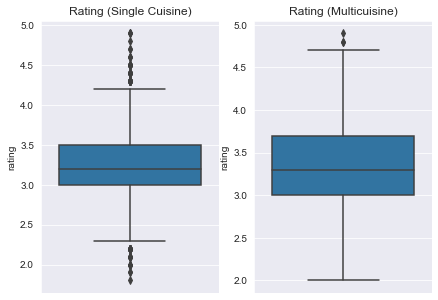

In [215]:
#Descripitive Statistics
fig, axes = plt.subplots(1,2, figsize=(7, 5))
sns.boxplot(ax = axes[0], y = singleCuisine["rating"] );
sns.boxplot(ax = axes[1],y = multiCuisine["rating"] );
axes[0].set_title('Rating (Single Cuisine)')
axes[1].set_title('Rating (Multicuisine)')

__5) How do fast food chains, like McDonald’s, Burger King, KFC, etc. compare to stand alone restaurants in ratings?__<br>

We shall bucket restaurants into two samples - fast food chains and stand alone restaurants. We shall analyze whether users rate these categories in a similar way or not.<br>
Hypothesis: <br>
H0: Mean rating for food chains is equal to mean rating for stand alone restaurants <br>
H1: Mean rating for food chains is not equal to mean rating for stand alone restaurants <br><br>
Mathematically,<br>
__H0: μ<sub>foodchains</sub> = μ<sub>stand-alone</sub><br>
HA: μ<sub>foodchains</sub>  ≠ μ<sub>stand-alone</sub>__<br>

Method: Two-sample two-tailed hypothesis z-test<br>
Reason: Large sample sizes.<br>
Level of significance, α = 0.05<br>
Result: Do we reject or fail to reject the null hypothesis. Do fast food chains and stand-alone restaurants have  different ratings?

In [216]:
#Dividing the df into stand alone restaurants and chains (more than 1 location)
restNum = df['restaurant_name'].value_counts().to_dict()
chains = list(restNum.keys())
chains = chains[:490]
resChain = df.loc[df['restaurant_name'].isin(chains),:]
resStandAlone = df.loc[~df['restaurant_name'].isin(chains),:]

In [217]:
#Checking sample size and variances
print("Restaurant Chains sample size : {}\nStand alone restaurant sample size : {}".format(len(resChain),len(resStandAlone)))
varResChain = np.var(resChain['rating'])
varResStandAlone = np.var(resStandAlone['rating'])
print("Restaurant Chains variance : {}\nStand Alone Chains variance : {}".format(varResChain,varResStandAlone))

Restaurant Chains sample size : 2004
Stand alone restaurant sample size : 3804
Restaurant Chains variance : 0.24139773347516527
Stand Alone Chains variance : 0.20452023701322675


Text(0.5, 1.0, 'Aggregate Rating (Stand Alone Restaurants)')

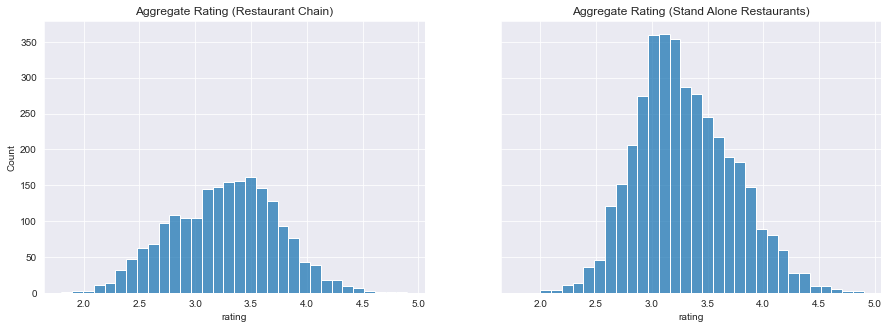

In [218]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize=(15, 5),sharex=True,sharey=True)
sns.histplot(ax =axes[0],data=resChain, x="rating",bins=32)
sns.histplot(ax =axes[1],data=resStandAlone, x="rating",bins=30)
axes[0].set_title('Aggregate Rating (Restaurant Chain)')
axes[1].set_title('Aggregate Rating (Stand Alone Restaurants)')

In [219]:
#performing Z test
se = ((varResChain/len(resChain))+(varResStandAlone/len(resStandAlone)))**0.5
mean_difference = resChain["rating"].mean()-resStandAlone["rating"].mean()
test_statistic = (mean_difference)/(se) 
p_val = stats.norm.sf(abs(test_statistic))*2 
print('\033[1m'+'Two Tailed Z Test : '+'\tTest statistic: %f' %(test_statistic))
print('\033[1m'+'\t\t\tp-value : {}' .format(p_val))

#printing confidence interval at a 0.05 significance level.
A = mean_difference-1.96*se
B = mean_difference+1.96*se
print('\033[1m'+'Confidence Interval :\t(%f,%f)' %(A,B)) 

Two Tailed Z Test : 	Test statistic: -2.425262
			p-value : 0.015297356012889906
Confidence Interval :	(-0.057883,-0.006141)


Text(0.5, 1.0, 'Rating (Fast Food)')

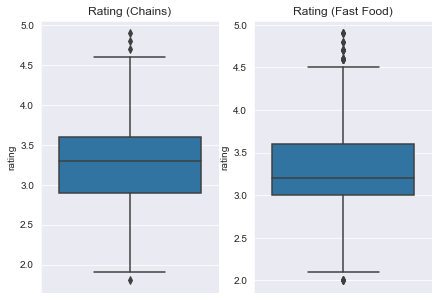

In [220]:
#Descriptive Statistics
fig, axes = plt.subplots(1,2, figsize=(7, 5))
sns.boxplot(ax = axes[0], y = resChain["rating"] );
sns.boxplot(ax = axes[1],y = resStandAlone["rating"] );
axes[0].set_title('Rating (Chains)')
axes[1].set_title('Rating (Fast Food)')

We reject the Null Hypothesis that rating for stand alone restaurants and chains are equal at a 0.05 significance level. <br>
The ratings for stand alone restaurants are higher.

__6) Can we build a linear model with the average rating as dependent variable given various features?__<br>


We shall perform feature engineering to convert our features into numerical data types. We will then create a linear regression model using the suitable independent features to predict the mean rating of restaurants.<br>

This trained model weights will also give us insights to those features that contribute to a higher rating.<br>
Features to be considered: <br>
1. Average Cost for two<br>
2. Has Table booking<br>
3. Has Online delivery<br>
4. Multi-cuisine <br>
5. Food Chain<br>
6. Fast Food<br>
7. Street Food<br>
8. Cafe<br>
9. Chinese <br>
10.North Indian <br>

__<center>E(Y = Aggregate Rating) = β<sub>0</sub> + β<sub>1</sub> * Average Cost For Two + β<sub>1</sub> * (Average Cost For Two)<sup>2</sup> + β<sub>3</sub> * Has Table Booking + β<sub>4</sub> * Has Online Delivery + 
<br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; β<sub>5</sub> * Is a Food Chain + β<sub>6</sub> * Is Multicuisine + β<sub>7</sub> * Is Fast Food + β<sub>8</sub> * Is Street Food + β<sub>9</sub> * Is Cafe + β<sub>10</sub> * Is Chinese +<br>β<sub>11</sub> * Is North Indian </center>__

Method: Multiple linear regression<br>

Result: Which features are the strongest predictors for the average restaurant rating?

In [221]:
#creating a boolean columns for various features
df["MULTICUISINE"]=df['cuisines']=='Multicuisine'
df["FAST_FOOD"]=df['cuisines']=='Fast Food'
df["STREET_FOOD"]=df['cuisines']=='Street Food'
df["CAFE"]=df['cuisines']=='Cafe'
df["CHINESE"]=df['cuisines']=='Chinese'
df["NORTH_INDIAN"]=df['cuisines']=='North Indian'
df["CHAINS"] = df['restaurant_name'].isin(chains)

In [231]:
dependents = ['avg_cost_for_two','has_table_booking','has_online_delivery','MULTICUISINE','FAST_FOOD','STREET_FOOD','CAFE','CHINESE','NORTH_INDIAN','CHAINS']                                             
df_corr = df[dependents]
df_corr.corr(method='pearson', min_periods=1)

,avg_cost_for_two,has_table_booking,has_online_delivery,MULTICUISINE,FAST_FOOD,STREET_FOOD,CAFE,CHINESE,NORTH_INDIAN,CHAINS
avg_cost_for_two,1.000000,0.631318,-0.016492,0.225470,-0.199637,-0.102592,-0.091990,-0.000281,-0.052376,-0.095186
has_table_booking,0.631318,1.000000,0.010119,0.301051,-0.222049,-0.057607,-0.133617,-0.012290,-0.044925,-0.130110
has_online_delivery,-0.016492,0.010119,1.000000,0.066375,0.052875,-0.059574,-0.080768,-0.034583,-0.025289,0.162829
MULTICUISINE,0.225470,0.301051,0.066375,1.000000,-0.460799,-0.100511,-0.247175,-0.156197,-0.325760,-0.130105
FAST_FOOD,-0.199637,-0.222049,0.052875,-0.460799,1.000000,-0.072975,-0.179459,-0.113405,-0.236514,0.195228
STREET_FOOD,-0.102592,-0.057607,-0.059574,-0.100511,-0.072975,1.000000,-0.039144,-0.024736,-0.051589,-0.053659
CAFE,-0.091990,-0.133617,-0.080768,-0.247175,-0.179459,-0.039144,1.000000,-0.060831,-0.126868,0.052506
CHINESE,-0.000281,-0.012290,-0.034583,-0.156197,-0.113405,-0.024736,-0.060831,1.000000,-0.080171,-0.021454
NORTH_INDIAN,-0.052376,-0.044925,-0.025289,-0.325760,-0.236514,-0.051589,-0.126868,-0.080171,1.000000,-0.076581
CHAINS,-0.095186,-0.130110,0.162829,-0.130105,0.195228,-0.053659,0.052506,-0.021454,-0.076581,1.000000


In [227]:
# Building Linear Model
model = ols('rating ~ avg_cost_for_two + np.power(avg_cost_for_two, 2) + has_table_booking + has_online_delivery + MULTICUISINE + FAST_FOOD + STREET_FOOD + CAFE + CHINESE + NORTH_INDIAN + CHAINS', data=df).fit()
df['RESIDUALS'] = model.resid
df['FITTED_VALUES'] = model.fittedvalues

Text(0.5, 1.0, 'Histogram of Residuals')

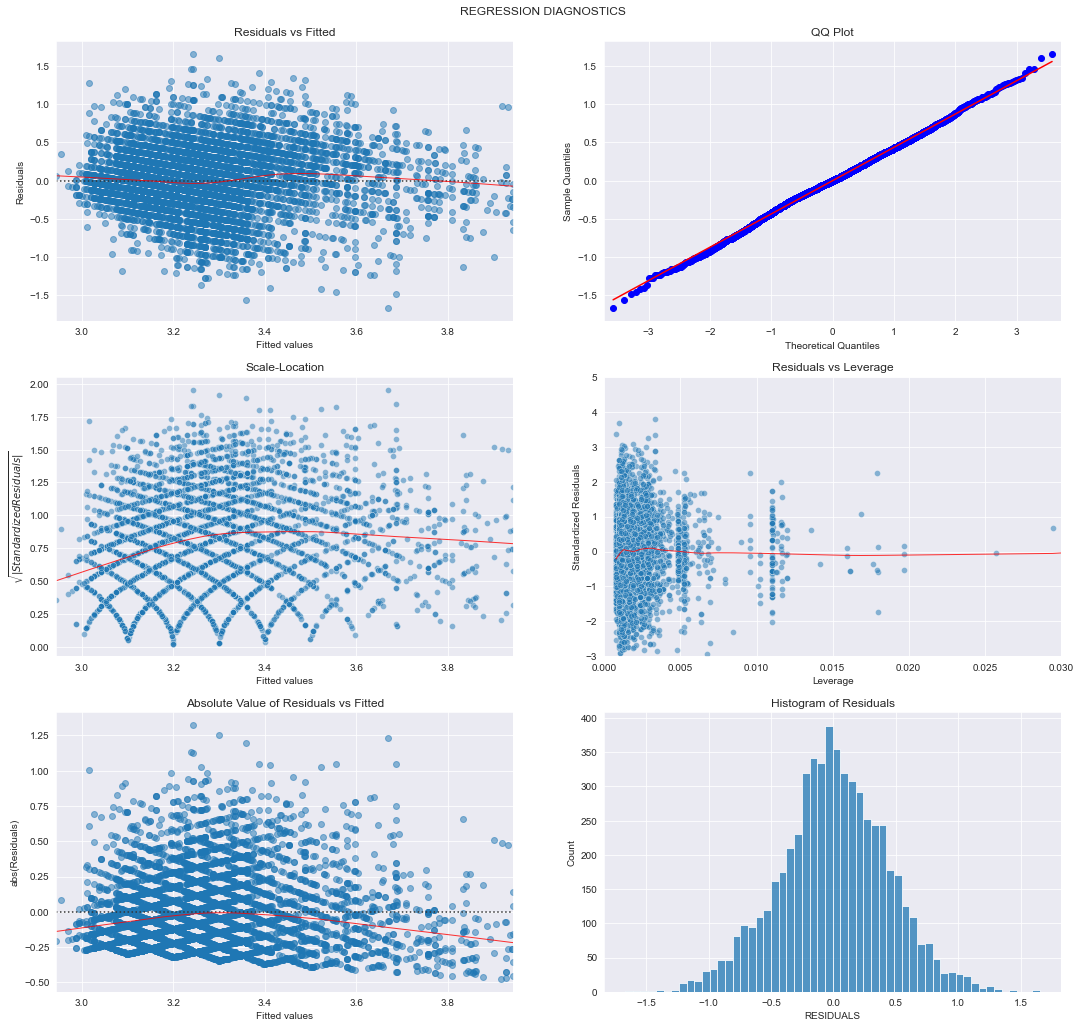

In [228]:
#Checking Assumptions
model_fitted_val = df['FITTED_VALUES']
model_residuals = df['RESIDUALS']

fig, axes = plt.subplots(3,2, figsize=(18, 16))
fig.suptitle('REGRESSION DIAGNOSTICS')

plt.subplots_adjust(top=0.95)
sns.residplot(ax = axes[0,0],x = model.fittedvalues,y = model_residuals, data=df, 
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[0,0].set_title('Residuals vs Fitted')
axes[0,0].set_xlabel('Fitted values')
axes[0,0].set_ylabel('Residuals');

model_residuals = abs(df['RESIDUALS'])


sns.residplot(ax = axes[2,0],x = model_fitted_val,y = model_residuals, data=df,
                                 lowess=True,
                                 scatter_kws={'alpha': 0.5},
                                 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[2,0].set_title('Absolute Value of Residuals vs Fitted')
axes[2,0].set_xlabel('Fitted values')
axes[2,0].set_ylabel('abs(Residuals)');

model_norm_residuals = model.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = model.get_influence().hat_matrix_diag
model_cooks = model.get_influence().cooks_distance[0]



sns.scatterplot(ax =axes[1,0],x = model_fitted_val, y = model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(ax =axes[1,0],x = model_fitted_val, y = model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[1,0].set_title('Scale-Location')
axes[1,0].set_xlabel('Fitted values')
axes[1,0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


sns.scatterplot(ax =axes[1,1],x = model_leverage, y = model_norm_residuals, alpha=0.5)
sns.regplot(ax = axes[1,1],x = model_leverage, y = model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

axes[1,1].set_xlim(0, 0.03)
axes[1,1].set_ylim(-3, 5)
axes[1,1].set_title('Residuals vs Leverage')
axes[1,1].set_xlabel('Leverage')
axes[1,1].set_ylabel('Standardized Residuals')


sm.qqplot(df['RESIDUALS'], line='s',ax = axes[0,1]);
axes[0,1].set_title('QQ Plot')

sns.histplot(data=df, x="RESIDUALS",ax = axes[2,1])
axes[2,1].set_title('Histogram of Residuals')


In [229]:
#Printing model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     76.57
Date:                Sun, 20 Mar 2022   Prob (F-statistic):          1.17e-161
Time:                        00:59:12   Log-Likelihood:                -3416.6
No. Observations:                5808   AIC:                             6857.
Df Residuals:                    5796   BIC:                             6937.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [232]:
#not done
red_model = ols('rating ~ avg_cost_for_two + np.power(avg_cost_for_two, 2) + has_table_booking + has_online_delivery + CHAINS', data=df).fit()
anovaResults = anova_lm(red_model, model)
f_statistic = anovaResults.values[1][4]
print('\033[1m'+"F statistic : %f"%(f_statistic))
p = stats.f.cdf(f_statistic, 6, 5797)
print("p value : "f'{p:.20f}')

F statistic : 19.590927
p value : 0.99999999999999988898


Let us now analyze Votes (number of ratings)

__1) Do customers leave significantly more reviews at expensive restaurants, rather than inexpensive restaurants? (μ = Mean number of votes)__<br>

Hypothesis: <br>
H0: Number of votes for expensive restaurants is equal to the number of votes for inexpensive restaurants<br>
HA: Number of votes for expensive restaurants is more than the number of votes for inexpensive restaurants

Mathematically,<br>
__H0: μ<sub>expensive</sub> = μ<sub>inexpensive</sub> <br>
HA: μ<sub>expensive</sub> > μ<sub>inexpensive</sub>__

Method : Two-sample two-tail hypothesis z-test. <br>
Level of significance, α = 0.05<br>
Result: Do we reject or fail to reject the null hypothesis. Do the votes for expensive and inexpensive restaurants differ?


Text(0.5, 1.0, 'Log Votes (Expensive)')

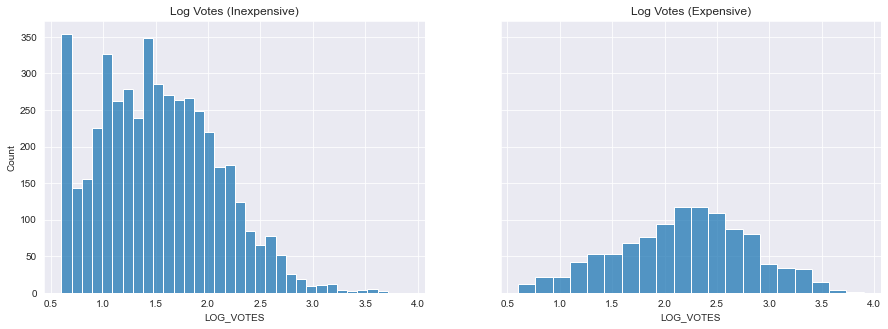

In [234]:
fig, axes = plt.subplots(1,2, figsize=(15,5),sharex=True,sharey=True)
sns.histplot(ax =axes[0],data=inexpensive, x="LOG_VOTES")
sns.histplot(ax =axes[1],data=expensive, x="LOG_VOTES")
axes[0].set_title('Log Votes (Inexpensive)')
axes[1].set_title('Log Votes (Expensive)')

In [235]:
#variance of votes for both population samples
varInexp = np.var(inexpensive['LOG_VOTES'])
varExp = np.var(expensive['LOG_VOTES'])
print("Inexpensive variance : {}\nExpensive variance : {}".format(varInexp,varExp))

Inexpensive variance : 0.318324195402962
Expensive variance : 0.3998245959916316


In [237]:
#performing Z test
se = ((varInexp/len(inexpensive))+(varExp/len(expensive)))**0.5
mean_difference = inexpensive["LOG_VOTES"].mean()-expensive["LOG_VOTES"].mean()
test_statistic = (mean_difference)/(se) 
p_val = stats.norm.sf(abs(test_statistic))
print('\033[1m'+'One Tailed Z Test : '+'\tTest statistic: %f' %(test_statistic))
scientific_notation = "{:.2e}".format(p_val)
print('\033[1m'+'\t\t\tp-value : {}' .format(scientific_notation))

#printing confidence interval at a 0.05 significance level.
A = mean_difference-1.96*se
B = mean_difference+1.96*se
print('\033[1m'+'Confidence Interval :\t(%f,%f)' %(A,B)) 

One Tailed Z Test : 	Test statistic: -31.279533
			p-value : 4.43e-215
Confidence Interval :	(-0.696068,-0.613979)


Text(0.5, 1.0, 'Log Votes (Expensive)')

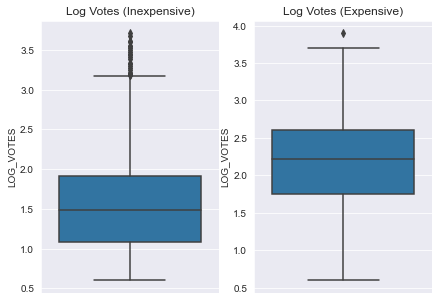

In [254]:
#Descriptive Stats
fig, axes = plt.subplots(1,2, figsize=(7, 5))
sns.boxplot(ax = axes[0], y = inexpensive["LOG_VOTES"] );
sns.boxplot(ax = axes[1],y = expensive["LOG_VOTES"] );
axes[0].set_title('Log Votes (Inexpensive)')
axes[1].set_title('Log Votes (Expensive)')

__2) Does providing an online delivery service affect the number of ratings?__<br>


Hypothesis: <br>
H0: Votes for Restaurants with Online Delivery is equal to Votes for Restaurants without Online Delivery <br>
HA: Votes for Restaurants with Online Delivery is higher to Votes for Restaurants without Online Delivery <br>

Mathematically,<br>
__H0: μ<sub>withdelivery</sub> = μ<sub>withoutdelivery</sub><br>
HA: μ<sub>withdelivery</sub> > μ<sub>withoutdelivery</sub>__

Method: Two-sample two-tail hypothesis z-test. <br>
Level of significance, α = 0.05<br>

Result: Do we reject or fail to reject the null hypothesis. Does the availability of online delivery services  affect the Votes?

In [239]:
#variance of votes for both population samples
varWDelV = np.var(withDelivery['LOG_VOTES'])
varWoDelV = np.var(withoutDelivery['LOG_VOTES'])
print("With Delivery variance : {}\nWithout Delivery variance : {}".format(varInexp,varExp))

With Delivery variance : 0.318324195402962
Without Delivery variance : 0.3998245959916316


In [240]:
#performing Z test
mean_difference = withDelivery["LOG_VOTES"].mean()-withoutDelivery["LOG_VOTES"].mean()
se = ((varWDelV/len(withDelivery))+(varWoDelV/len(withoutDelivery)))**0.5
test_statistic = (mean_difference)/(se) 
p_val = stats.norm.sf(abs(test_statistic))*2 
print('\033[1m'+'Two Tailed Z Test : '+'\tTest statistic: %f' %(test_statistic))
scientific_notation = "{:.2e}".format(p_val)
print('\033[1m'+'\t\t\tp-value : {}' .format(scientific_notation))

#printing confidence interval at a 0.05 significance level.
A = mean_difference-1.96*se
B = mean_difference+1.96*se
print('\033[1m'+'Confidence Interval :\t(%f,%f)' %(A,B)) 

Two Tailed Z Test : 	Test statistic: 23.584684
			p-value : 5.54e-123
Confidence Interval :	(0.343481,0.405745)


Text(0.5, 1.0, 'Log Votes (Without Delivery)')

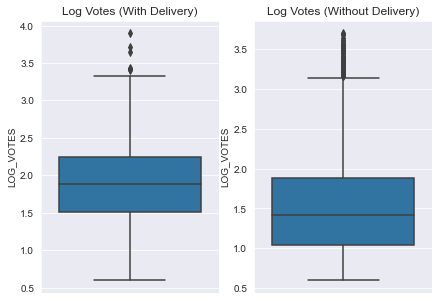

In [253]:
#Descriptive Stats
fig, axes = plt.subplots(1,2, figsize=(7, 5))
sns.boxplot(ax = axes[0], y = withDelivery["LOG_VOTES"] );
sns.boxplot(ax = axes[1],y = withoutDelivery["LOG_VOTES"] );
axes[0].set_title('Log Votes (With Delivery)')
axes[1].set_title('Log Votes (Without Delivery)')

__3) Does offering table reservations affect the Votes?__<br>


Hypothesis: <br>
H0: Votes for Restaurants with Table Booking is equal to Votes for Restaurants without Table Booking <br>
HA: Votes for Restaurants with Table Booking is higher to Votes for Restaurants without Table Booking <br>

Mathematically,<br>
__H0: μ<sub>withtablebooking</sub> = μ<sub>withouttablebooking</sub><br>
HA: μ<sub>withtablebooking</sub> > μ<sub>withouttablebooking</sub>__

Method: Two-sample two-tail hypothesis z-test. <br>
Level of significance, α = 0.05<br>

Result: Do we reject or fail to reject the null hypothesis. Does the availability of table reservations affect the Votes?

With Table Booking variance : 0.3748472952121802
Without Table Booking variance : 0.3504507365810944


Text(0.5, 1.0, 'Votes (Without Table Reservations)')

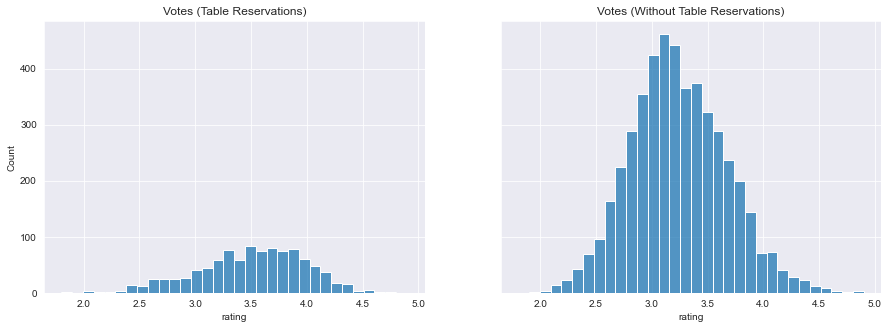

In [242]:
#variance of votes for both population samples
varTBook = np.var(tableBooking['LOG_VOTES'])
varTNBook = np.var(noTableBooking['LOG_VOTES'])
print("With Table Booking variance : {}\nWithout Table Booking variance : {}".format(varTBook,varTNBook))
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize=(15, 5),sharex=True,sharey=True)
sns.histplot(ax =axes[0],data=tableBooking, x="rating",bins=31)
sns.histplot(ax =axes[1],data=noTableBooking, x="rating",bins=31)

axes[0].set_title('Votes (Table Reservations)')
axes[1].set_title('Votes (Without Table Reservations)')

In [258]:
#performing Z test
mean_difference = tableBooking["LOG_VOTES"].mean()-noTableBooking["LOG_VOTES"].mean()
se = ((varTBook/len(tableBooking))+(varTNBook/len(noTableBooking)))**0.5
test_statistic = (mean_difference)/(se) 
p_val = stats.norm.sf(abs(test_statistic))*2 
print('\033[1m'+'Two Tailed Z Test : '+'\tTest statistic: %f' % (test_statistic))
scientific_notation = "{:.2e}".format(p_val)
print('\033[1m'+'\t\t\tp-value : {}' .format(scientific_notation))

#printing confidence interval at a 0.05 significance level.
A = mean_difference-1.96*se
B = mean_difference+1.96*se
print('\033[1m'+'Confidence Interval :\t(%f,%f)' %(A,B)) 

Two Tailed Z Test : 	Test statistic: 26.134219
			p-value : 1.49e-150
Confidence Interval :	(0.511111,0.593991)


Text(0.5, 1.0, 'Log Votes (No Table Booking)')

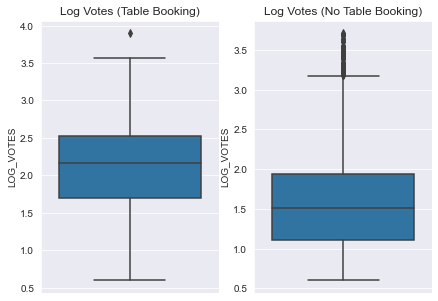

In [259]:
#Descriptive Stats
fig, axes = plt.subplots(1,2, figsize=(7, 5))
sns.boxplot(ax = axes[0], y = tableBooking["LOG_VOTES"] );
sns.boxplot(ax = axes[1],y = noTableBooking["LOG_VOTES"] );
axes[0].set_title('Log Votes (Table Booking)')
axes[1].set_title('Log Votes (No Table Booking)')

__4) How does cuisine affect the Votings?<br> 
a) How do the Votes compare for the top 5 cuisines?__<br>



Here we are going to compare the top 5 cuisines using ANOVA to see if there is any statistically significant difference for their votes.<br>
Level of significance, α = 0.05<br>
H0: There is no difference in average rating of  top 5 cuisines <br>
H1: There is a difference in average rating of top 5 cuisines<br>

Mathematically,<br>
__H<sub>0</sub>: μ<sub>cusine1</sub> = μ<sub>cusine2</sub> = μ<sub>cusine3</sub> = μ<sub>cusine4</sub> = μ<sub>cusine5</sub><br>
H<sub>1</sub>: Ǝi,j : μ<sub>cusine<sub>i</sub></sub>  ≠ μ<sub>cusine<sub>j</sub></sub><br>__<br>
Method: Analysis of Variance (ANOVA)<br>
Five specific cuisines we are going to analyze:<br>
1)Fast Food<br>
2)North Indian<br>
3)Cafe<br>
4)Chinese<br>
5)Street Food<br>
<br>
Result: Do we reject or fail to reject the null hypothesis. Do the restaurants serving the above cuisines have  different Votes?

In [249]:
#Checking variance and sample size and variance for all these groups
df1,df2,df3,df4,df5 = [df_topCuisine.loc[(df_topCuisine["cuisines"] == x)] for x in ['Fast Food','North Indian','Cafe','Chinese','Street Food']]
print("Fast Food sample size : %f\nNorth Indian sample size : %f\nCafe sample size : %f\nChinese sample size : %f\nStreet Food sample size : %f" %(len(df1),len(df2),len(df3),len(df4),len(df5)))
print("\n\nFast Food variance : %f\nNorth Indian variance : %f\nCafe variance : %f\nChinese variance : %f\nStreet Food variance : %f" %(df1["LOG_VOTES"].var(),df2["LOG_VOTES"].var(),df3["LOG_VOTES"].var(),df4["LOG_VOTES"].var(),df5["LOG_VOTES"].var()))

Fast Food sample size : 1456.000000
North Indian sample size : 832.000000
Cafe sample size : 510.000000
Chinese sample size : 215.000000
Street Food sample size : 91.000000


Fast Food variance : 0.328929
North Indian variance : 0.397256
Cafe variance : 0.285264
Chinese variance : 0.345665
Street Food variance : 0.365784


In [250]:
#performing ANOVA
modelTopCuisine = ols('LOG_VOTES ~ cuisines',data=df_topCuisine).fit()
anova = sm.stats.anova_lm(modelTopCuisine,typ=1)
print(anova)
scientific_notation = "{:.2e}".format(anova['PR(>F)'][0])
print('\033[1m'+"\n\nF statistic : %f"%(anova['F'][0]))
print('\033[1m'+'p-value : {}' .format(scientific_notation))

              df       sum_sq   mean_sq         F        PR(>F)
cuisines     4.0    12.422235  3.105559  9.072484  2.771960e-07
Residual  3099.0  1060.803859  0.342305       NaN           NaN


F statistic : 9.072484
p-value : 2.77e-07


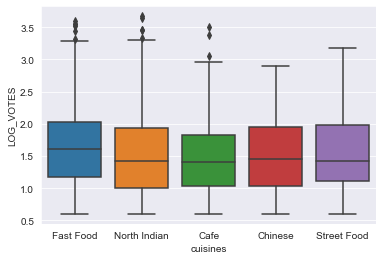

In [251]:
#Descriptive Stats
sns.boxplot( x= df_topCuisine["cuisines"],y=df_topCuisine["LOG_VOTES"] );

In [ ]:
#performing pair wise two tailed Z tests
def Ztest(df, pair):
    df1,df2 = [df.loc[(df["cuisines"] == x)] for x in pair]
    test_statistic = (df1["LOG_VOTES"].mean()-df2["LOG_VOTES"].mean())/(((np.var(df1["LOG_VOTES"])/len(df1))+(np.var(df2["LOG_VOTES"])/len(df2)))**0.5) 
    p_val = stats.norm.sf(abs(test_statistic))*2 
    print('\033[1m'+"For Pair (%s,%s) :"%(pair[0],pair[1]))
    print('Two Tailed Z Test : '+'\tTest statistic: %f' %(test_statistic))
    #scientific_notation = "{:.2e}".format(p_val)
    print('\t\t\tp-value : {}' .format(p_val))
groups=['Fast Food','North Indian','Cafe','Chinese','Street Food']
for i in range(len(groups)-1):
    for j in range(i+1,len(groups)):
        Ztest(df_topCuisine,[groups[i],groups[j]])        

__b) Are multi cuisine restaurants have more votes than single cuisine restaurants?__<br>


North Indian  : North Indian, Rajasthani, Lucknowi, Kashmiri, Mughlai<br>
South Indian  : South Indian, Kerala, Hyderabadi, Chettinad, Andhra, Mangalorean<br>
North East Indian : North Eastern, Assamese<br>
East Indian : East Indian, Bihari, Awadhi, Oriya, Bengali<br>
West Indian : West Indian, Gujarati, Goan, Maharashtrian<br>
Asian : Asian, Japanese, Thai, Korean, Vietnamese, Sushi, Malaysian<br>
Chinese   : Chinese, Naga, Tibetan, Burmese<br>
Cafe      : Cafe, Cafe, Bakery, Desserts<br>
Beverages : Beverages, Drinks Only, Tea, Juices<br>
European  : European, Continental, French, British, Belgian, Portuguese<br>
Mediterranean : Mediterranean, Greek, Spanish<br>
Middle Eastern : Middle Eastern, Iranian, Moroccan, Turkish, Lebanese, Armenian, Lebanese, Persian<br>
American  : American, South American, Tex-Mex, Steak<br>
Italian   : Italian, Pizza<br>
Healthy   : Healthy Food, Salad<br>

Hypothesis: <br>
H0: Votes for multi-cuisine restaurants is equal to Votes for single-cuisine restaurants <br>
H1: Votes for multi-cuisine restaurants is higher than the Votes for single-cuisine restaurants<br>

Mathematically,<br>
__H0: μ<sub>multicuisine</sub> = μ<sub>singlecuisine</sub><br>
HA: μ<sub>multicuisine</sub>  > μ<sub>singlecuisine</sub>__  <br>

Method: Two-tail two-sample hypothesis z-test.<br>
Reason: Large sample sizes.<br>
Level of significance, α = 0.05<br>
Result: Do we reject or fail to reject the null hypothesis. Do multicuisine restaurants have significantly higher Votes?
    

Text(0.5, 1.0, 'Log Votes (multicuisine)')

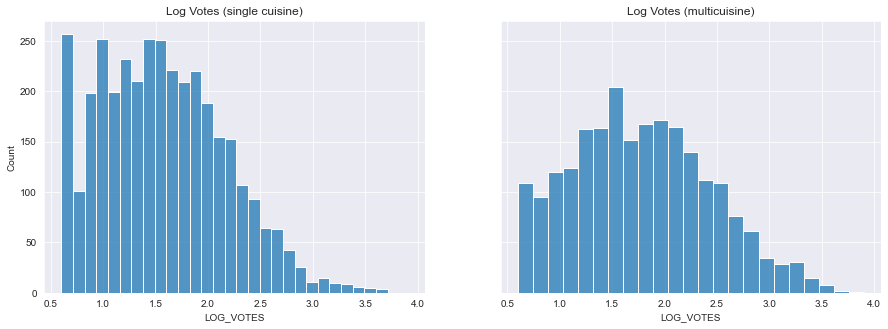

In [256]:
fig, axes = plt.subplots(1,2, figsize=(15, 5),sharex=True,sharey=True)
sns.histplot(ax =axes[0],data=singleCuisine, x="LOG_VOTES")
sns.histplot(ax =axes[1],data=multiCuisine, x="LOG_VOTES")
axes[0].set_title('Log Votes (single cuisine)')
axes[1].set_title('Log Votes (multicuisine)')

In [260]:
#Performing Z test
mean_difference = singleCuisine["LOG_VOTES"].mean()-multiCuisine["LOG_VOTES"].mean()
se = ((varSingleCuisine/len(singleCuisine))+(varMultiCuisine/len(multiCuisine)))**0.5
test_statistic = (mean_difference)/(se) 
p_val = stats.norm.sf(abs(test_statistic))
print('\033[1m'+'Two Tailed Z Test : '+'\tTest statistic: %f' %(test_statistic))
scientific_notation = "{:.2e}".format(p_val)
print('\033[1m'+'\t\t\tp-value : {}' .format(scientific_notation))

#printing confidence interval at a 0.05 significance level.
A = mean_difference-1.96*se
B = mean_difference+1.96*se
print('\033[1m'+'Confidence Interval :\t(%f,%f)' %(A,B)) 

Two Tailed Z Test : 	Test statistic: -16.177518
			p-value : 3.63e-59
Confidence Interval :	(-0.233985,-0.183415)


Text(0.5, 1.0, 'Log Votes (multicuisine)')

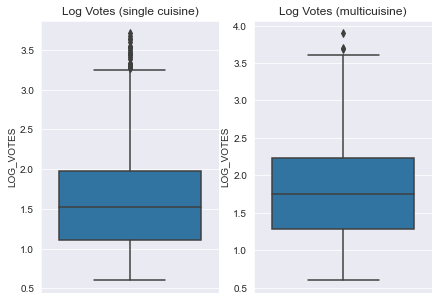

In [262]:
#Descriptive Stats
fig, axes = plt.subplots(1,2, figsize=(7, 5))
sns.boxplot(ax = axes[0], y = singleCuisine["LOG_VOTES"] );
sns.boxplot(ax = axes[1],y = multiCuisine["LOG_VOTES"] );
axes[0].set_title('Log Votes (single cuisine)')
axes[1].set_title('Log Votes (multicuisine)')

__5) How do fast food chains, like McDonald’s, Burger King, KFC, etc. compare to stand alone restaurants for Votes?__<br>


Hypothesis: <br>
H0: Votes for food chains is equal to Votes for stand alone restaurants <br>
H1: Votes for food chains is not equal to Votes for stand alone restaurants <br><br>
Mathematically,<br>
__H0: μ<sub>foodchains</sub> = μ<sub>stand-alone</sub><br>
HA: μ<sub>foodchains</sub>  ≠ μ<sub>stand-alone</sub>__<br>

Method: Two-sample two-tailed hypothesis z-test<br>
Reason: Large sample sizes.<br>
Level of significance, α = 0.05<br>
Result: Do we reject or fail to reject the null hypothesis. Do fast food chains and stand-alone restaurants have significantly different votes?

In [264]:
#checking sample size and variances
print("Restaurant Chains sample size : {}\nStand alone restaurant sample size : {}".format(len(resChain),len(resStandAlone)))
varResChain = np.var(resChain['LOG_VOTES'])
varResStandAlone = np.var(resStandAlone['LOG_VOTES'])
print("Restaurant Chains variance : {}\nStand Alone Chains variance : {}".format(varResChain,varResStandAlone))

Restaurant Chains sample size : 2004
Stand alone restaurant sample size : 3804
Restaurant Chains variance : 0.37573803382235005
Stand Alone Chains variance : 0.39627233290553626


Text(0.5, 1.0, 'Log Votes (Stand Alone Restaurants)')

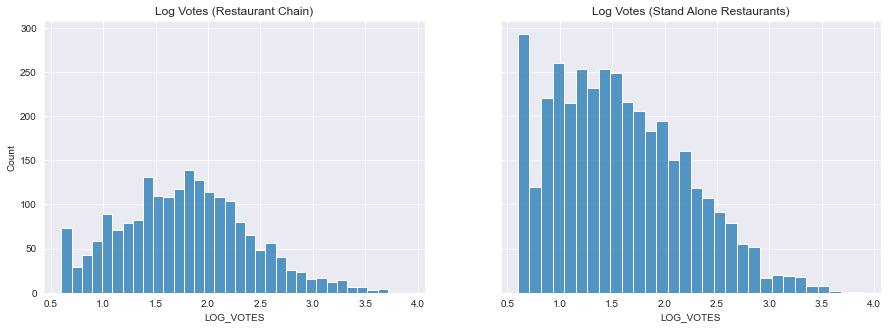

In [265]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize=(15, 5),sharex=True,sharey=True)
sns.histplot(ax =axes[0],data=resChain, x="LOG_VOTES",bins=32)
sns.histplot(ax =axes[1],data=resStandAlone, x="LOG_VOTES",bins=30)
axes[0].set_title('Log Votes (Restaurant Chain)')
axes[1].set_title('Log Votes (Stand Alone Restaurants)')

In [266]:
#performing Z test
se = ((varResChain/len(resChain))+(varResStandAlone/len(resStandAlone)))**0.5
mean_difference = resChain["LOG_VOTES"].mean()-resStandAlone["LOG_VOTES"].mean()
test_statistic = (mean_difference)/(se) 
p_val = stats.norm.sf(abs(test_statistic))*2 
print('\033[1m'+'Two Tailed Z Test : '+'\tTest statistic: %f' %(test_statistic))
print('\033[1m'+'\t\t\tp-value : {}' .format(p_val))

#printing confidence interval at a 0.05 significance level.
A = mean_difference-1.96*se
B = mean_difference+1.96*se
print('\033[1m'+'Confidence Interval:\t(%f,%f)' %(A,B)) 

Two Tailed Z Test : 	Test statistic: 11.722822
			p-value : 9.737300707184355e-32
Confidence Interval:	(0.166732,0.233679)


Text(0.5, 1.0, 'Log Votes (Restaurant Stand Alone)')

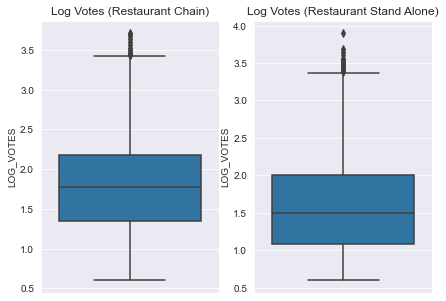

In [268]:
#Descriptive Stats
fig, axes = plt.subplots(1,2, figsize=(7, 5))
sns.boxplot(ax = axes[0], y = resChain["LOG_VOTES"] );
sns.boxplot(ax = axes[1],y = resStandAlone["LOG_VOTES"] );
axes[0].set_title('Log Votes (Restaurant Chain)')
axes[1].set_title('Log Votes (Restaurant Stand Alone)')

__6) Can we build a linear model with Votes as dependent variable given various features?__<br>


This trained model weights will also give us insights to those features that contribute to higher votes.<br>
Features to be considered: <br>
1. Average Cost for two<br>
2. Has Table booking<br>
3. Has Online delivery<br>
4. Multi-cuisine <br>
5. Food Chain<br>
6. Fast Food<br>
7. Street Food<br>
8. Cafe<br>
9. Chinese <br>
10.North Indian <br>

__<center>E(Y = Votes) = β<sub>0</sub> + β<sub>1</sub> * Average Cost For Two + β<sub>1</sub> * (Average Cost For Two)<sup>2</sup> + β<sub>3</sub> * Has Table Booking + β<sub>4</sub> * Has Online Delivery + 
<br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; β<sub>5</sub> * Is a Food Chain + β<sub>6</sub> * Is Multicuisine + β<sub>7</sub> * Is Fast Food + β<sub>8</sub> * Is Street Food + β<sub>9</sub> * Is Cafe + β<sub>10</sub> * Is Chinese +<br>β<sub>11</sub> * Is North Indian </center>__

Method: Multiple linear regression<br>

Result: Which features are the strongest predictors for Votes?

In [269]:
# Building Linear Model
model = ols('LOG_VOTES ~ avg_cost_for_two + np.power(avg_cost_for_two, 2) + has_table_booking + has_online_delivery + MULTICUISINE + FAST_FOOD + STREET_FOOD + CAFE + CHINESE + NORTH_INDIAN + CHAINS', data=df).fit()
df['RESIDUALS'] = model.resid
df['FITTED_VALUES'] = model.fittedvalues

(1.0, 3.0)

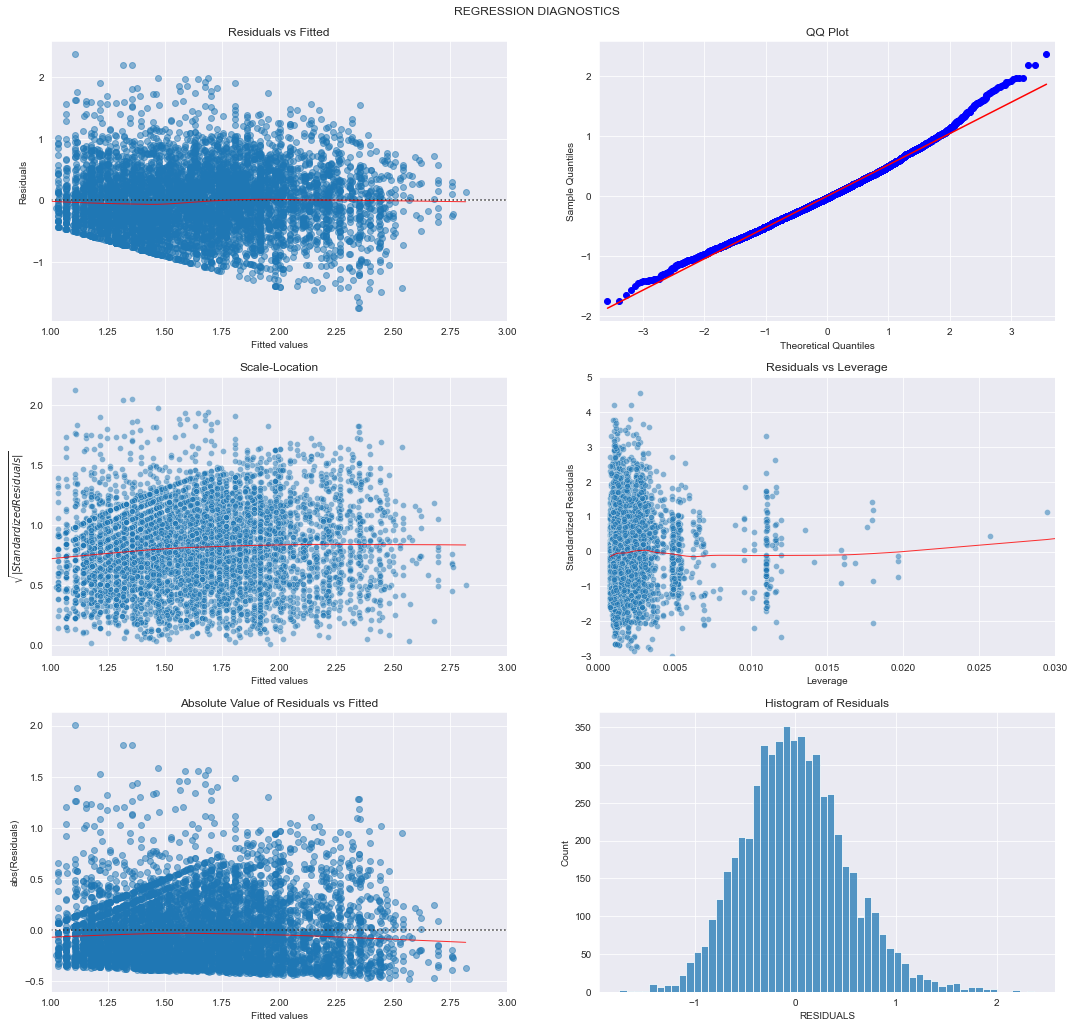

In [270]:
model_fitted_val = df['FITTED_VALUES']
model_residuals = df['RESIDUALS']

fig, axes = plt.subplots(3,2, figsize=(18, 16))
fig.suptitle('REGRESSION DIAGNOSTICS')

plt.subplots_adjust(top=0.95)
sns.residplot(ax = axes[0,0],x = model.fittedvalues,y = model_residuals, data=df, 
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[0,0].set_title('Residuals vs Fitted')
axes[0,0].set_xlabel('Fitted values')
axes[0,0].set_ylabel('Residuals');

model_residuals = abs(df['RESIDUALS'])


sns.residplot(ax = axes[2,0],x = model_fitted_val,y = model_residuals, data=df,
                                 lowess=True,
                                 scatter_kws={'alpha': 0.5},
                                 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[2,0].set_title('Absolute Value of Residuals vs Fitted')
axes[2,0].set_xlabel('Fitted values')
axes[2,0].set_ylabel('abs(Residuals)');

model_norm_residuals = model.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = model.get_influence().hat_matrix_diag
model_cooks = model.get_influence().cooks_distance[0]



sns.scatterplot(ax =axes[1,0],x = model_fitted_val, y = model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(ax =axes[1,0],x = model_fitted_val, y = model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
axes[1,0].set_title('Scale-Location')
axes[1,0].set_xlabel('Fitted values')
axes[1,0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


sns.scatterplot(ax =axes[1,1],x = model_leverage, y = model_norm_residuals, alpha=0.5)
sns.regplot(ax = axes[1,1],x = model_leverage, y = model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

axes[1,1].set_xlim(0, 0.03)
axes[1,1].set_ylim(-3, 5)
axes[1,1].set_title('Residuals vs Leverage')
axes[1,1].set_xlabel('Leverage')
axes[1,1].set_ylabel('Standardized Residuals')


sm.qqplot(df['RESIDUALS'], line='s',ax = axes[0,1]);
axes[0,1].set_title('QQ Plot')

sns.histplot(data=df, x="RESIDUALS",ax = axes[2,1])
axes[2,1].set_title('Histogram of Residuals')

axes[0,0].set_xlim(1,3)
axes[1,0].set_xlim(1,3)
axes[2,0].set_xlim(1,3)

In [271]:
#Printing model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              LOG_VOTES   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     241.4
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:15:33   Log-Likelihood:                -4472.4
No. Observations:                5808   AIC:                             8969.
Df Residuals:                    5796   BIC:                             9049.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [272]:
#not done
red_model = ols('LOG_VOTES ~ avg_cost_for_two + np.power(avg_cost_for_two, 2) + has_table_booking + has_online_delivery + CHAINS', data=df).fit()
anovaResults = anova_lm(red_model, model)
f_statistic = anovaResults.values[1][4]
print('\033[1m'+"F statistic : %f"%(f_statistic))
p = stats.f.cdf(f_statistic, 6, 5797)
print("p value : "f'{p:.20f}')

F statistic : 14.046908
p value : 0.99999999999999933387
